In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv("used_cars_data.csv")
print(data)
pd.options.display.max_columns=14
print(data.head())
print(data.tail())
print("\nBasic information about data in each columns\n-------------------")
print(data.info())
print("\nNumber of Unique values in data\n------------------------")
print(data.nunique())
print("\nNumber of nan values in each columns\n-----------------------------")
print(data.isnull().sum())
print("\nPercentage of nan values in each column\n------------------------------")
print((data.isnull().sum()/len(data))*100)


    
    
    


      S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type

In [2]:
# Removing S NO from data
data=data.drop(['S.No.'],axis=1)
data=data.drop(['New_Price'],axis=1)
data=data.dropna()
print(data.isnull().sum())

print("\nDropping S.No and New_Price columns since S.No has no power over data prediction and New_Price has 86% of nan values\n----------------------------------------")
print(data.info())

print("\nConverting 'Mileage','Engine,'Power' to float type as they are object type due to unit")
def clean_and_convert(column):
    return pd.to_numeric(column.str.extract('(\d+\.?\d*)')[0], errors='coerce')

data['Mileage'] = clean_and_convert(data['Mileage'])
data['Engine'] = clean_and_convert(data['Engine'])
data['Power'] = clean_and_convert(data['Power'])

data['Mileage']=data['Mileage'].astype(float)
data['Engine'] = data['Engine'].astype(float)
data['Power'] = data['Power'].astype(float)



print("\nInfo about Data after converting\n---------------------------")
print(data.info())




    

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

Dropping S.No and New_Price columns since S.No has no power over data prediction and New_Price has 86% of nan values
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage 


Creating a new column which has age of the car
------------------------------
                               Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  ...  Seats  Price  Car_Age    Brand  \
0       CNG       Manual      First  ...    5.0   1.75       14   Maruti   
1    Diesel       Manual      First  ...    5.0  12.50        9  Hyundai   
2    Petrol       Manual      First  ...    5.0   4.50       13    Honda   
3    Diesel       Manual      First  ...    7.0   6.00       12   Maruti   
4    Diesel    Automatic     Second  ...    5.0  17.74       11     Audi   

       

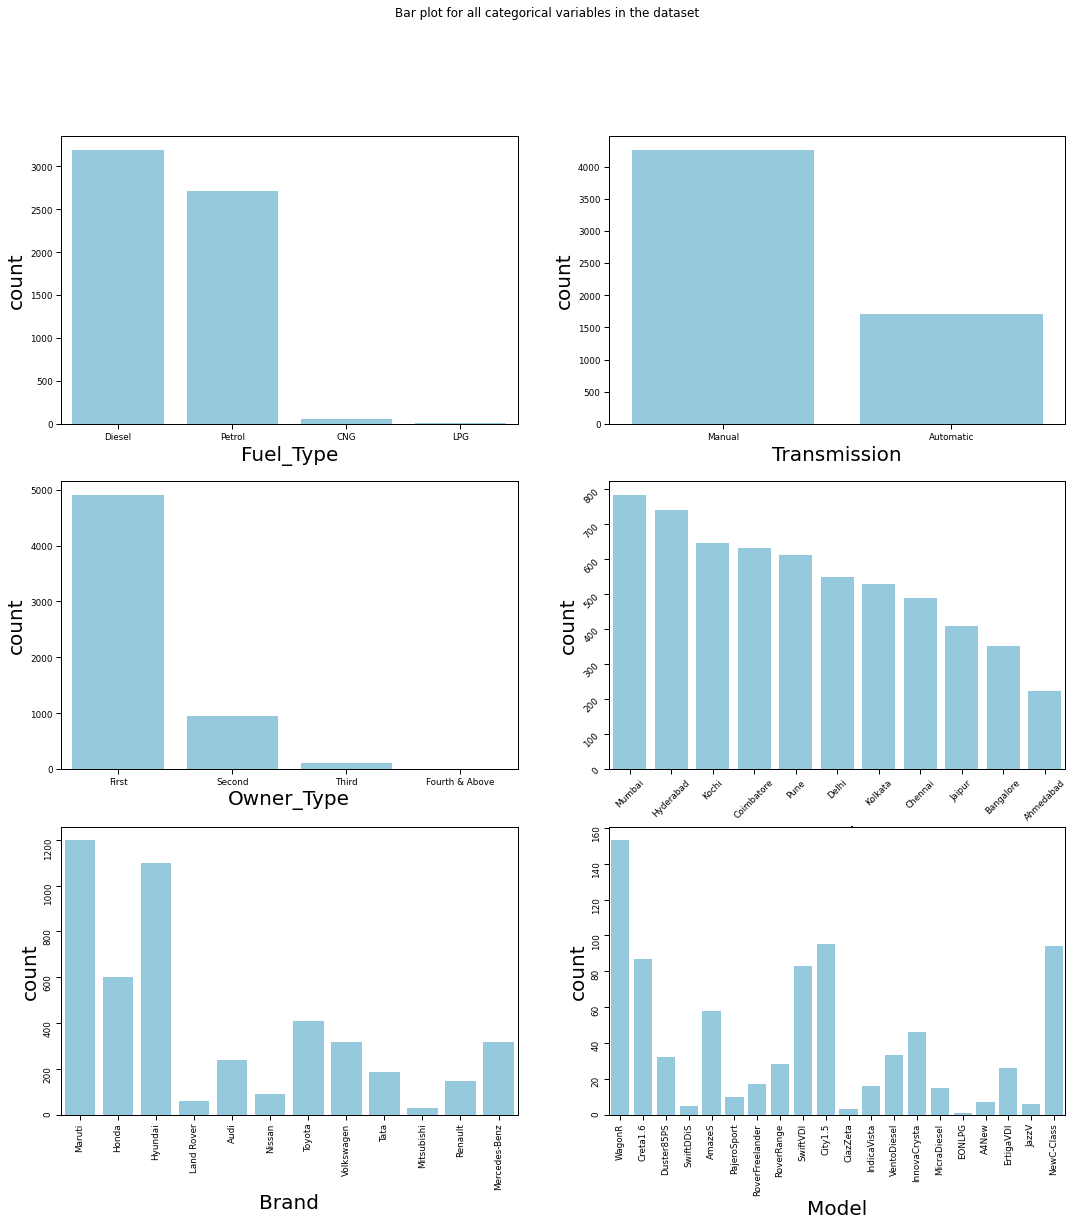

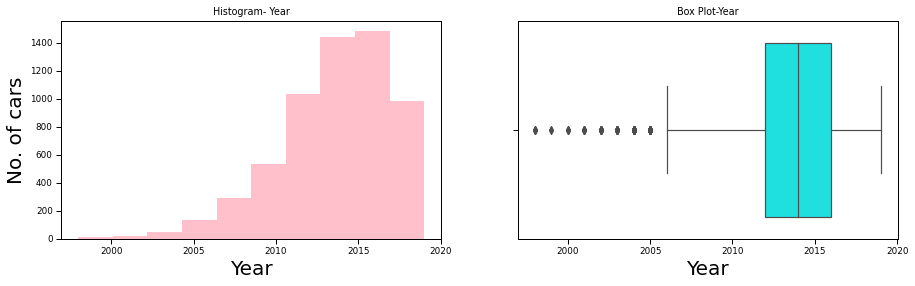

Kilometers_Driven
Skew : 58.6


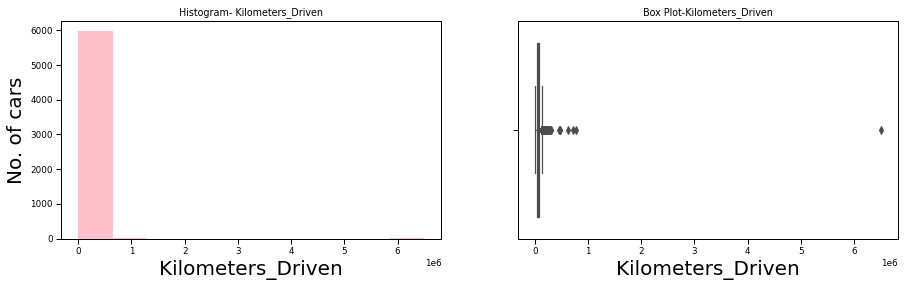

Mileage
Skew : -0.35


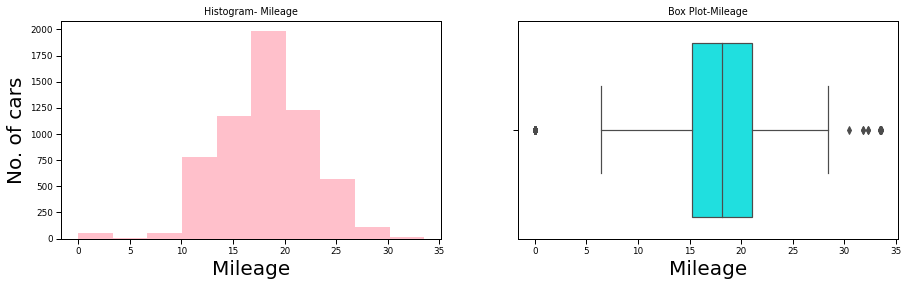

Engine
Skew : 1.43


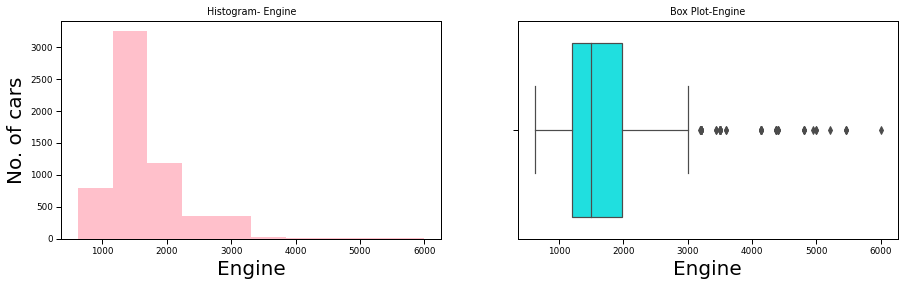

Power
Skew : 1.92


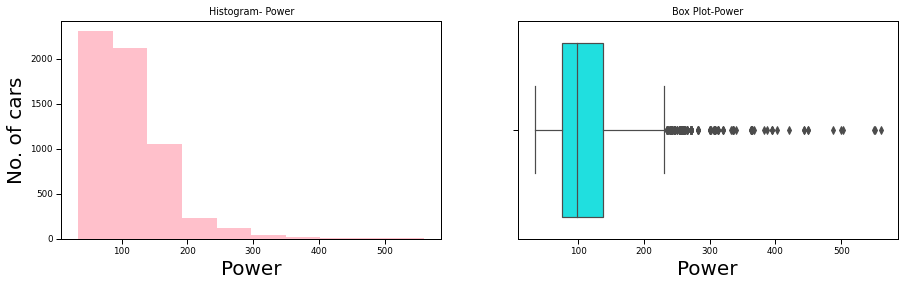

Seats
Skew : 1.84


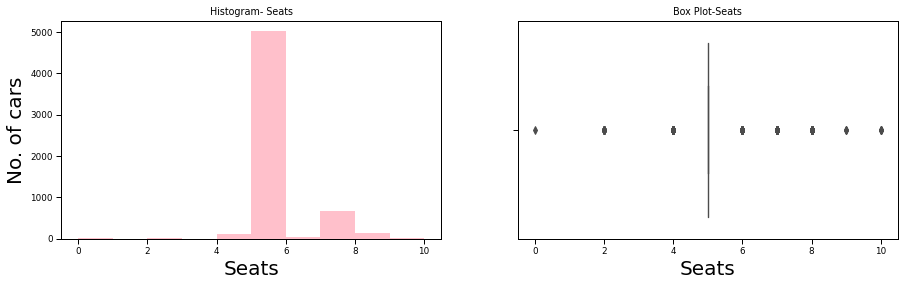

Price
Skew : 3.33


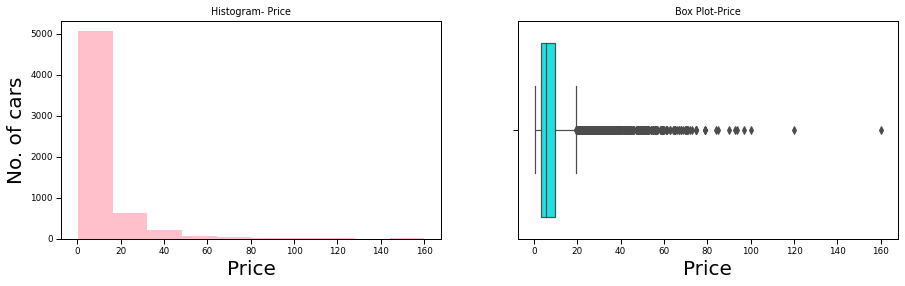

Car_Age
Skew : 0.84


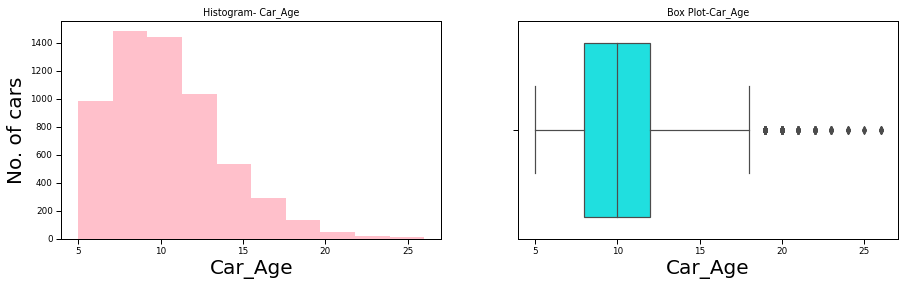

Kilometers_Driven_log
Skew : -1.29


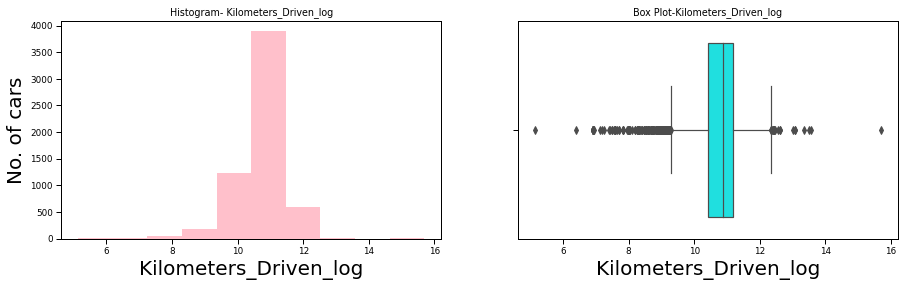

Price_log
Skew : 0.42


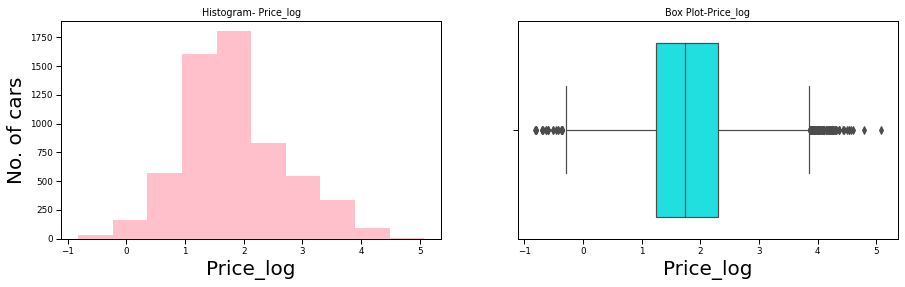

In [14]:
#Creating features
print("\nCreating a new column which has age of the car\n------------------------------")
from datetime import date
date.today().year
data['Car_Age']=date.today().year-data['Year']
print(data.head())

print("\n Splitting Name column to Brand and Model\n-------------------------------")
data['Brand']=data.Name.str.split().str.get(0)
data['Model']=data.Name.str.split().str.get(1)+data.Name.str.split().str.get(2)

print(data.Brand)
print(data.Brand.unique())
print(data.Brand.nunique())
print("\n Data replace in brand names")
search_for=['IZUSU','Izusu','Mini','Land']
print(data[data.Brand.str.contains('|'.join(search_for))].head(5))
data["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)
print(data)
print("\nData Description which gives statistical analysis of numerical columns\n---------------------------")
print(data.describe().T)

print("\n Data Description of all columns which includes object types also\n--------------------------------")
print(data.describe(include='all').T)

print("Separating Categorical columns and numerical columns\n---------------------------------")
cat_cols=data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)



fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset',fontsize=12)
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = data, color = 'skyblue', 
              order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = data, color = 'skyblue', 
              order = data['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = data, color = 'skyblue', 
              order = data['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = data, color = 'skyblue', 
              order = data['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = data, color = 'skyblue', 
              order = data['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = data, color = 'skyblue', 
              order = data['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);


for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False,color='pink')
    plt.title(("Histogram- "+col))
    plt.xlabel(col)
    plt.ylabel('No. of cars')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col],color='cyan').set(title=('Box Plot-'+col))
    plt.show()



In [4]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()
log_transform(data,['Kilometers_Driven','Price'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   5975 non-null   object 
 1   Location               5975 non-null   object 
 2   Year                   5975 non-null   int64  
 3   Kilometers_Driven      5975 non-null   int64  
 4   Fuel_Type              5975 non-null   object 
 5   Transmission           5975 non-null   object 
 6   Owner_Type             5975 non-null   object 
 7   Mileage                5975 non-null   float64
 8   Engine                 5975 non-null   float64
 9   Power                  5872 non-null   float64
 10  Seats                  5975 non-null   float64
 11  Price                  5975 non-null   float64
 12  Car_Age                5975 non-null   int64  
 13  Brand                  5975 non-null   object 
 14  Model                  5975 non-null   object 
 15  Kilo

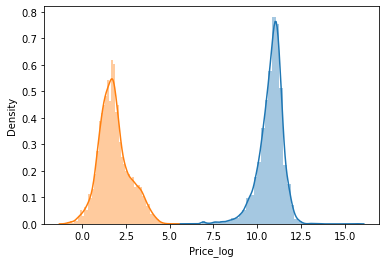

In [5]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(data["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log");
sns.distplot(data['Price_log'],axlabel='Price_log');



<Figure size 1440x1440 with 0 Axes>

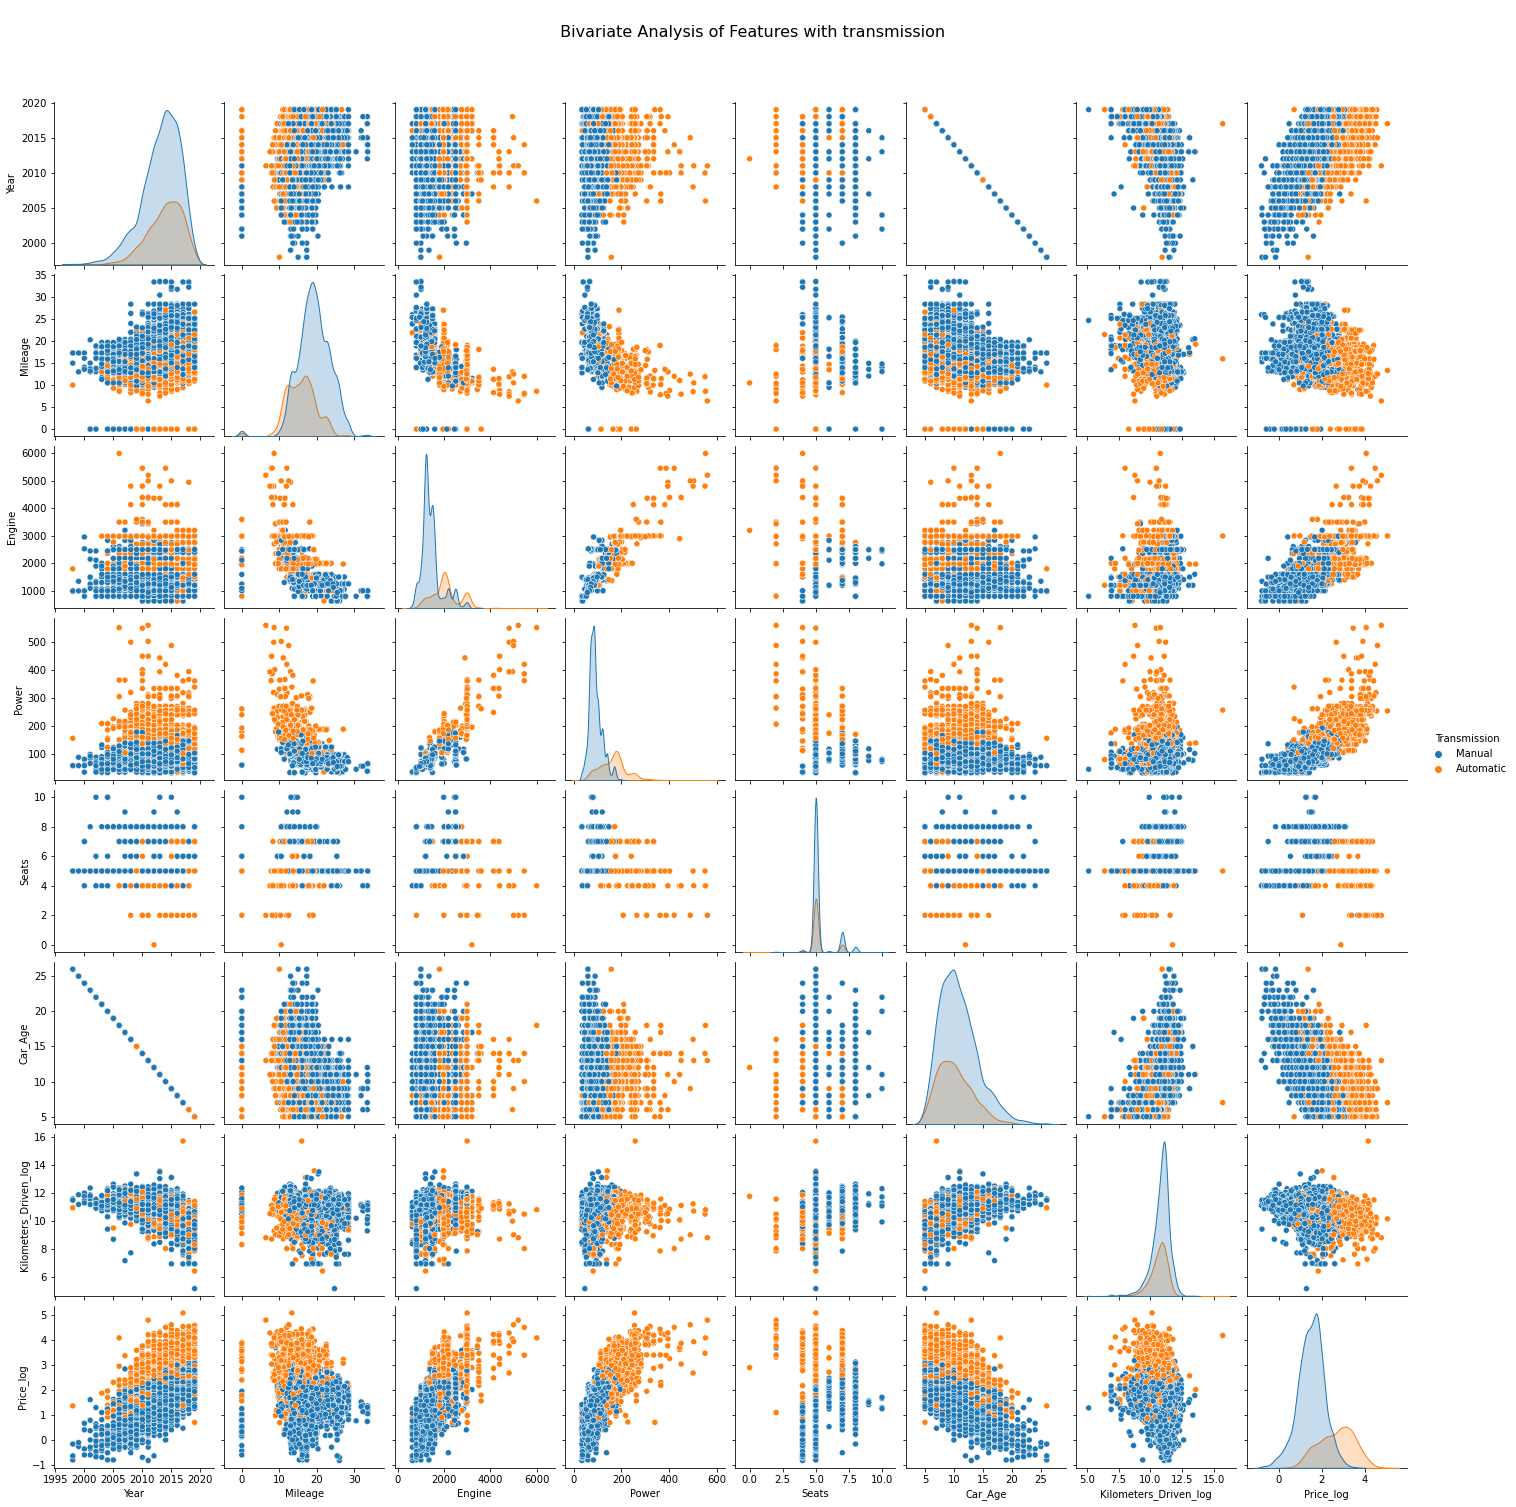

In [6]:
# Bi-variate analysis of numerical features except Kilometers_Driven and Price

plt.figure(figsize=(20,20))
sns.pairplot(data=data.drop(['Kilometers_Driven','Price'],axis=1),hue='Transmission',hue_order=["Manual","Automatic"])
sns.set_context("paper",rc={'axes.labelsize':20})
plt.suptitle("\n Bivariate Analysis of Features with transmission\n",y=1.05,fontsize=16)

plt.show()



      Year  Kilometers_Driven  Mileage  Engine   Power  Seats  Price  Car_Age  \
0     2010              72000    26.60   998.0   58.16    5.0   1.75       14   
1     2015              41000    19.67  1582.0  126.20    5.0  12.50        9   
2     2011              46000    18.20  1199.0   88.70    5.0   4.50       13   
3     2012              87000    20.77  1248.0   88.76    7.0   6.00       12   
4     2013              40670    15.20  1968.0  140.80    5.0  17.74       11   
...    ...                ...      ...     ...     ...    ...    ...      ...   
6014  2014              27365    28.40  1248.0   74.00    5.0   4.75       10   
6015  2015             100000    24.40  1120.0   71.00    5.0   4.00        9   
6016  2012              55000    14.00  2498.0  112.00    8.0   2.90       12   
6017  2013              46000    18.90   998.0   67.10    5.0   2.65       11   
6018  2011              47000    25.44   936.0   57.60    5.0   2.50       13   

      Kilometers_Driven_log

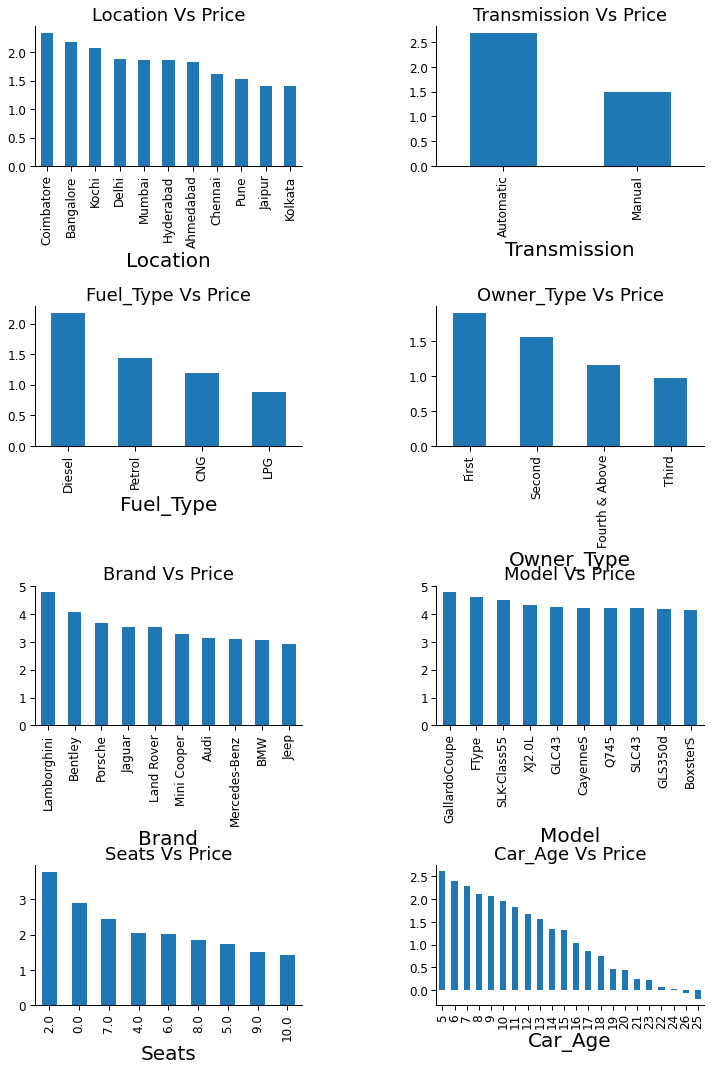

In [7]:
# Categorical analysis
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
data.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
data.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
data.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
data.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
data.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
data.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
data.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)
data.groupby('Car_Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

df_num=data._get_numeric_data()
print(df_num)



<Figure size 864x504 with 0 Axes>

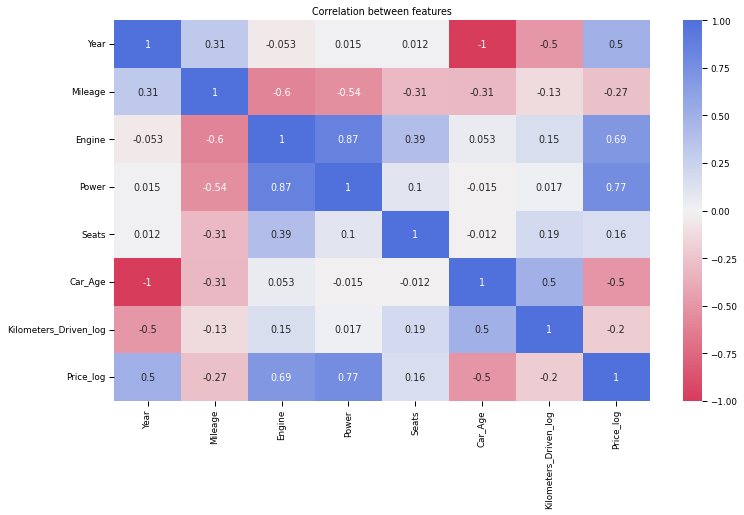

In [8]:
#EDA multivariate analysis
cmap=sns.diverging_palette(5, 260, as_cmap=True)
plt.figure(figsize=(12, 7))
plt.figure(figsize=(12, 7))
plt.title("Correlation between features")
sns.heatmap(df_num.drop(['Kilometers_Driven','Price'],axis=1).corr(),annot=True,cmap=cmap,vmin = -1,vmax = 1)
plt.show()
